## Visualizing  embeddings of supervised pre-training and contrastive learning

In [1]:
# Reads in an annotation file from filename
# Returns list of class_ids from the file
import numpy as np
import json

def get_classes(filename):
    with open(filename, "r") as f:
        lines = f.readlines()
    return np.asarray([int(line.split()[2]) for line in lines])

# Extracts the numpy features from a json file
# Output is a NxD array, where N is the number of examples and D is the 
# extracted feature size
def get_features(filename):
    with open(filename, "r") as f:
        data = json.load(f)
        arr = np.asarray(data)
    return arr

In [2]:
DATASET_PATH = '/vision/group/ntu-rgbd/'
supp_ann_filename = DATASET_PATH + '50_few_shot_depth_support_val_ann.txt'
supp_classes = get_classes(supp_ann_filename)
feature_dir = 'features/'

In [39]:
# Visualizing supervised embeddings
from sklearn.manifold import TSNE
rgb_supervised_feats = get_features(feature_dir + 'no_contrastive/rgb_test_embeds.json')

In [40]:
tsne = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        learning_rate="auto",
        n_iter=400,
    )
rgb_supervised_feats_tsne = tsne.fit_transform(rgb_supervised_feats)

In [41]:
print(len(supp_classes))

500


In [42]:
print(len(rgb_supervised_feats_tsne))

500


In [43]:
import matplotlib.pyplot as plt

In [70]:
classid2str = {
    0:"Drinking",
    36:"Wiping",
    6:"Throwing",
    42:"Falling",
    12:"Tearing",
    48:"Fanning",
    18:"Glasses",
    54:"Hugging",
    24:"Reaching",
    30:"Pointing",
}

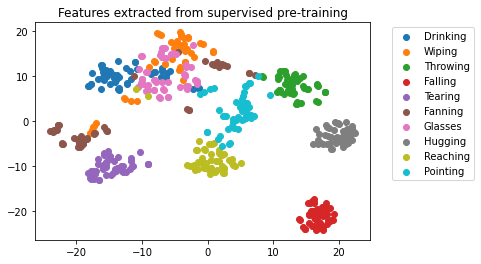

In [71]:
class_names = set(supp_classes)
for c in class_names:
    idxs = np.where(supp_classes == c)
    plt.scatter(rgb_supervised_feats_tsne[idxs,0], rgb_supervised_feats_tsne[idxs,1], label = classid2str[c])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Features extracted from supervised pre-training")
plt.show()

In [46]:
print(class_names)

{0, 36, 6, 42, 12, 48, 18, 54, 24, 30}


In [47]:
rgb_contrastive_feats = get_features(feature_dir + 'contrastive/rgb_test_embeds.json')

In [67]:
tsne2 = TSNE(
        n_components=2,
        init="random",
        random_state=0,
        learning_rate="auto",
        n_iter=400,
    )
rgb_contrastive_feats_tsne = tsne2.fit_transform(rgb_contrastive_feats)

In [68]:
print(rgb_contrastive_feats.shape)

(500, 768)


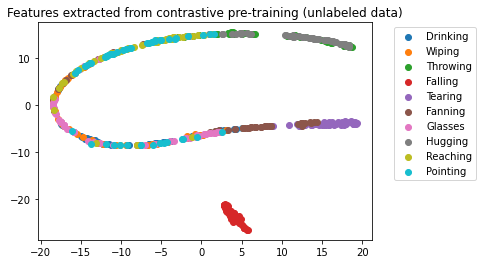

In [72]:
class_names = set(supp_classes)
for c in class_names:
    idxs = np.where(supp_classes == c)
    plt.scatter(rgb_contrastive_feats_tsne[idxs,0], rgb_contrastive_feats_tsne[idxs,1], label = classid2str[c])
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title("Features extracted from contrastive pre-training (unlabeled data)")
plt.show()